In [1]:
#pip install pycountry pycountry-convert

In [2]:
#pip install pycountry

In [3]:
#pip install countryinfo

In [4]:
#pip install tabulate

In [5]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from countryinfo import CountryInfo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import pycountry
import pycountry_convert as pc

# Настройки отображения для pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Игнорирование предупреждений
warnings.filterwarnings("ignore")

# Установка случайного семени
RANDOM = 42

In [6]:
d = {'url':'https://www.numbeo.com/quality-of-life/rankings_by_country.jsp',
     'name': 'rankings_by_country',
     'load_func': lambda URL: pd.read_html(URL)[1]}

df = d['load_func'](d['url'])

In [7]:
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,NaN,Luxembourg,219.3,182.5,65.7,75.3,62.4,8.9,27.2,23.3,82.6
1,NaN,Netherlands,207.5,124.9,73.6,79.3,63.1,7.7,23.5,21.4,87.0
2,NaN,Denmark,205.6,127.2,73.9,78.5,72.3,6.6,27.8,20.8,83.7
3,NaN,Oman,204.3,139.8,81.8,65.1,42.4,2.9,21.0,35.0,67.2
4,NaN,Switzerland,204.0,158.7,73.9,71.7,101.1,10.4,32.9,23.3,82.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            0 non-null      float64
 1   Country                         83 non-null     object 
 2   Quality of Life Index           83 non-null     float64
 3   Purchasing Power Index          83 non-null     float64
 4   Safety Index                    83 non-null     float64
 5   Health Care Index               83 non-null     float64
 6   Cost of Living Index            83 non-null     float64
 7   Property Price to Income Ratio  83 non-null     float64
 8   Traffic Commute Time Index      83 non-null     float64
 9   Pollution Index                 83 non-null     float64
 10  Climate Index                   83 non-null     float64
dtypes: float64(10), object(1)
memory usage: 7.3+ KB


In [9]:
df.describe()

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,0.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,NaN,142.625301,77.042169,60.075904,65.186747,45.889157,13.081928,35.375904,52.291566,77.767470
std,NaN,38.202873,40.117778,13.343461,9.585021,16.461574,6.500397,8.348939,20.779635,16.165758
min,NaN,42.700000,11.000000,25.200000,42.200000,18.800000,2.900000,21.000000,11.900000,20.200000
25%,NaN,113.000000,41.550000,52.300000,57.950000,31.700000,8.850000,29.100000,34.650000,67.800000
50%,NaN,142.700000,71.400000,59.000000,66.000000,42.400000,12.100000,35.300000,56.700000,81.200000
75%,NaN,172.000000,109.600000,70.750000,72.450000,59.700000,15.400000,39.650000,68.650000,89.100000
max,NaN,219.300000,182.500000,84.400000,86.400000,101.100000,39.100000,64.200000,89.400000,99.800000


# Задание 1

Найти 5 стран с наивысшим индексом качества жизни, исключая Люксембург, Данию и Швейцарию.

In [10]:
### find top 5 countries by Quality of Life Index, excluding Luxembourg, Denmark, Switzerland
top_5_quality_of_life = (
    df[~df['Country'].isin(['Luxembourg', 'Denmark', 'Switzerland'])]
    .nlargest(5, 'Quality of Life Index')['Country']
    .tolist()
)

print('Top 5 countries by Quality of Life Index, excluding Luxembourg, Denmark, Switzerland:\n', 
      top_5_quality_of_life)

Top 5 countries by Quality of Life Index, excluding Luxembourg, Denmark, Switzerland:
 ['Netherlands', 'Oman', 'Finland', 'Iceland', 'Austria']


# Задание 2

1) Рассчитайте средний индекс качества жизни в Европе;
2) Рассчитайте средний индекс качества жизни в Африке;

В данных нет столбца "Континент". Попробуйте получить данные самостоятельно.

In [11]:
# Функция для получения названия континента
def country_to_continent(country_name):
    try:
        # Получаем информацию о стране
        country_info = CountryInfo(country_name)
        continent = country_info.region()
        return continent
    except Exception as e:
        return None  # Возвращаем None, если страна не найдена или произошла ошибка

# Применяем функцию к столбцу 'Country' и создаем новый столбец 'Continent'
df['Continent'] = df['Country'].apply(country_to_continent)

# Проверим
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Continent
0,NaN,Luxembourg,219.3,182.5,65.7,75.3,62.4,8.9,27.2,23.3,82.6,Europe
1,NaN,Netherlands,207.5,124.9,73.6,79.3,63.1,7.7,23.5,21.4,87.0,Europe
2,NaN,Denmark,205.6,127.2,73.9,78.5,72.3,6.6,27.8,20.8,83.7,Europe
3,NaN,Oman,204.3,139.8,81.8,65.1,42.4,2.9,21.0,35.0,67.2,Asia
4,NaN,Switzerland,204.0,158.7,73.9,71.7,101.1,10.4,32.9,23.3,82.0,Europe


In [12]:
print("Список стран с пропусками в столбце 'Continent':", df[df['Continent'].isnull()]['Country'].tolist())

Список стран с пропусками в столбце 'Continent': ['Hong Kong (China)', 'North Macedonia']


In [13]:
# Заполним пропуски
df.loc[df['Country'] == 'Hong Kong (China)', 'Continent'] = 'Asia'
df.loc[df['Country'] == 'North Macedonia', 'Continent'] = 'Europe'

In [14]:
### calculate average Quality of Life Index in Europe
avg_quality_of_life_europe = (
    df[df['Continent'] == 'Europe']['Quality of Life Index'].mean()
)

print(f'Average Quality of Life Index in Europe: {avg_quality_of_life_europe:.2f}')

Average Quality of Life Index in Europe: 162.02


In [15]:
### calculate average Quality of Life Index in Africa
avg_quality_of_life_africa = (
    df[df['Continent'] == 'Africa']['Quality of Life Index'].mean()
)

print(f'Average Quality of Life Index in Africa: {avg_quality_of_life_africa:.2f}')

Average Quality of Life Index in Africa: 98.82


# Задание 3

Попробуйте разделить страны на сегменты, используя подход, который вам больше нравится.

Рассмотрим различные "ручные" варианты кластеризации:

### Сегментация по континентам

In [16]:
# Создадим таблицу континентов и стран
continents = df.groupby('Continent').agg(
    Countries=('Country', lambda x: ', '.join(x))  # Список стран для каждого континента
).reset_index()

continents

,Continent,Countries
0,Africa,"South Africa, Morocco, Kenya, Egypt, Nigeria"
1,Americas,"United States, Canada, Uruguay, Mexico, Ecuador, Panama, Argentina, Brazil, Colombia, Chile, Peru"
2,Asia,"Oman, Japan, Qatar, United Arab Emirates, Saudi Arabia, Singapore, Taiwan, Israel, Kuwait, South Korea, Hong Kong (China), Malaysia, Turkey, India, Jordan, Georgia, China, Azerbaijan, Pakistan, Kazakhstan, Indonesia, Thailand, Vietnam, Philippines, Lebanon, Iran, Sri Lanka, Bangladesh"
3,Europe,"Luxembourg, Netherlands, Denmark, Switzerland, Finland, Iceland, Austria, Norway, Sweden, Germany, Estonia, Spain, Slovenia, Croatia, Czech Republic, Lithuania, United Kingdom, Portugal, Belgium, Ireland, France, Latvia, Cyprus, Slovakia, Poland, Italy, Hungary, Bulgaria, Romania, Greece, Bosnia And Herzegovina, Belarus, Serbia, North Macedonia, Russia, Ukraine, Albania"
4,Oceania,"Australia, New Zealand"


In [17]:
# Группируем данные по континентам и вычисляем средние значения для всех числовых колонок
continent_groups = df.groupby('Continent').mean(numeric_only=True)
continent_groups

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Continent,,,,,,,,,,
Africa,NaN,98.820000,41.320000,41.540000,53.500000,29.320000,14.020000,47.380000,73.060000,88.500000
Americas,NaN,125.700000,56.709091,43.354545,65.572727,42.363636,13.427273,39.509091,55.318182,88.200000
Asia,NaN,128.442857,74.703571,65.603571,65.964286,40.032143,15.982143,39.128571,65.935714,68.710714
Europe,NaN,162.021622,87.135135,63.781081,65.756757,52.445946,10.900000,29.672973,39.645946,79.156757
Oceania,NaN,184.950000,124.200000,52.450000,70.850000,67.400000,8.600000,35.600000,26.650000,94.650000


<Figure size 4000x2500 with 0 Axes>

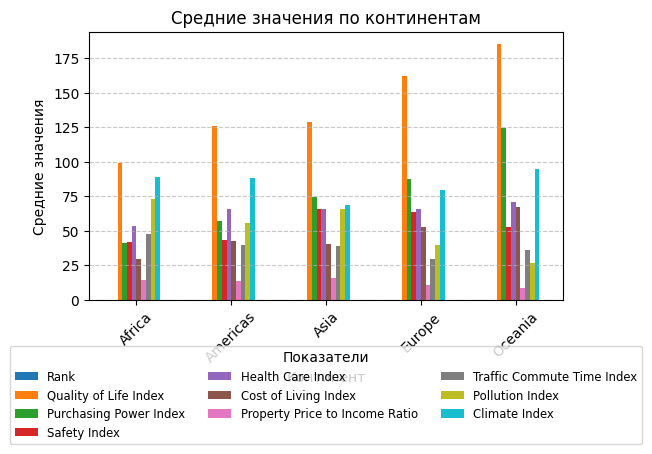

In [18]:
# Визуализация
plt.figure(figsize=(40, 25))
continent_groups.plot(kind='bar')

# Настройка заголовков и меток
plt.title('Средние значения по континентам')
plt.xlabel('Континент')
plt.ylabel('Средние значения')
plt.xticks(rotation=45)

# Размещаем легенду под графиком
plt.legend(title='Показатели', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize='small')

# Добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показать график
plt.tight_layout()
plt.show();

**Краткие выводы**

По уровню жизни однозначно лидирует Океания, но в нашем случае Океанию представляют всего две страны, у которых очень высокий уровень жизни: Австралия и Новая Зеландия. В то же время, к примеру, Азию представляют как высокоразвитые страны (Южная Корея, Тайвань итп), так и страны с крайне низким уровнем жизни (Бангладеш).

То есть с одной стороны кластеризация по континентам может упростить анализ, а также помочь выявить связи между континентами, с другой стороны упрощение данных может привести к потере важной информации, что может исказить выводы. Такой способ нам не подходит.

### Сегментация на основе индексов

Можно создать сегменты на основе значений индексов, например, разбив их на низкий, средний и высокий уровни. Сразу возникает проблема, какие пороговые значения выбрать?
Я не нашла четкого ответа в интернете на эти вопросы, поэтому исходя из наших данных сегментируем на основе Quality of Life Index:
1. Высокий уровень жизни:
   - Можно установить порог выше 75го процентиля (172);

2. Средний уровень жизни:
   - Средний уровень можно установить в диапазоне от 25го процентиля (113) до 75го процентиля (172).

3. Низкий уровень жизни:
   - Значения ниже 25го процентиля (113) могут быть отнесены к низкому уровню жизни. 

In [19]:
# Функция для сегментации индекса качества жизни
def segment_quality_of_life(index):
    if index < 113:
        return 'Low'
    elif 113 <= index < 172:
        return 'Medium'
    else:
        return 'High'

df['Quality Segment'] = df['Quality of Life Index'].apply(segment_quality_of_life)

In [20]:
# Создадим таблицу сегментов качества жизни и стран
quality_segments = df.groupby('Quality Segment').agg(
    Countries=('Country', lambda x: ', '.join(x))  # Список стран для каждого сегмента
).reset_index()

quality_segments

,Quality Segment,Countries
0,High,"Luxembourg, Netherlands, Denmark, Oman, Switzerland, Finland, Iceland, Austria, Norway, Sweden, Australia, United States, Germany, New Zealand, Japan, Estonia, Qatar, Spain, Slovenia, United Arab Emirates, Croatia"
1,Low,"Azerbaijan, Morocco, Russia, Ukraine, Colombia, Kenya, Pakistan, Albania, Chile, Kazakhstan, Indonesia, Thailand, Vietnam, Philippines, Lebanon, Egypt, Peru, Iran, Sri Lanka, Bangladesh, Nigeria"
2,Medium,"Czech Republic, Lithuania, United Kingdom, Saudi Arabia, Portugal, Belgium, Singapore, Ireland, Canada, France, Latvia, Taiwan, Israel, Cyprus, Slovakia, Kuwait, South Korea, Poland, South Africa, Italy, Uruguay, Hungary, Bulgaria, Romania, Hong Kong (China), Malaysia, Greece, Bosnia And Herzegovina, Turkey, Mexico, Belarus, India, Ecuador, Jordan, Panama, Georgia, Serbia, China, Argentina, North Macedonia, Brazil"


Аналогично можно сегментировать данные в зависимости от других индексов (уровень безопасности, покупателская способность, доступность жилья и так далее), но у подхода есть существенный минус в том, что нет четких порогов деления на сегменты. Такой метод нам не подходит.

### Сегментация на основе нескольких критериев

Можно создать многофакторную классификацию, комбинируя несколько индексов.

Опять-таки сталкиваемся с проблемой, какие пороговые значения использовать и какие индексы комбинировать между собой. 

К примеру, сегментируем страны по Quality of Life Index и Safety Index:
1. Высокий уровень жизни и безопасности:
   - Можно установить порог Quality of Life Index выше 75го процентиля (172) и Safety Index выше 75го процентиля (70.75);

2. Средний уровень жизни и безопасности:
   - Средний уровень можно установить Quality of Life Index в диапазоне от 25го процентиля (113) до 75го процентиля (172) и Safety Index в диапазоне от 25го процентиля (52.3) до 75го процентиля (70.75).

3. Низкий уровень жизни и безопасности:
   - Значения Quality of Life Index ниже 25го процентиля (113) и Safety Index ниже 25го процентиля (52.3) могут быть отнесены к низкому уровню жизни. 

In [21]:
# Функция для сегментации в зависимости от уровня жизни и безопасности
def classify_quality_safety(row):
    if row['Quality of Life Index'] >= 172 and row['Safety Index'] >= 70.75:
        return 'High Quality and Safety'
    elif row['Quality of Life Index'] >= 113 and row['Safety Index'] >= 52.3:
        return 'Medium Quality and Safety'
    elif row['Quality of Life Index'] < 113 and row['Safety Index'] < 52.3:
        return 'Low Quality and Safety'
    else:
        return 'Mixed'

# Применяем функцию к каждой строке DataFrame
df['Quality and Safety Segment'] = df.apply(classify_quality_safety, axis=1)

In [22]:
# Создадим таблицу сегментов качества жизни и стран
quality_safety_segments = df.groupby('Quality and Safety Segment').agg(
    Countries=('Country', lambda x: ', '.join(x))  # Список стран для каждого сегмента
).reset_index()

# Выводим результат
quality_safety_segments

,Quality and Safety Segment,Countries
0,High Quality and Safety,"Netherlands, Denmark, Oman, Switzerland, Finland, Iceland, Japan, Estonia, Qatar, Slovenia, United Arab Emirates, Croatia"
1,Low Quality and Safety,"Colombia, Kenya, Chile, Peru, Iran, Bangladesh, Nigeria"
2,Medium Quality and Safety,"Luxembourg, Austria, Norway, Australia, Germany, Spain, Czech Republic, Lithuania, Saudi Arabia, Portugal, Singapore, Ireland, Canada, Latvia, Taiwan, Israel, Cyprus, Slovakia, Kuwait, South Korea, Poland, Italy, Hungary, Bulgaria, Romania, Hong Kong (China), Greece, Bosnia And Herzegovina, Turkey, India, Jordan, Panama, Georgia, Serbia, China, North Macedonia"
3,Mixed,"Sweden, United States, New Zealand, United Kingdom, Belgium, France, South Africa, Uruguay, Malaysia, Mexico, Belarus, Ecuador, Argentina, Brazil, Azerbaijan, Morocco, Russia, Ukraine, Pakistan, Albania, Kazakhstan, Indonesia, Thailand, Vietnam, Philippines, Lebanon, Egypt, Sri Lanka"


Опять-таки минус метода в том, что можно долго вручную миксовать различные индексы, но не факт что это приведет к каким-либо значимым результатам. Поэтому будем использовать методы машинного обучения, которые смогут определить скрытые взаимосвязи и более качественно разделить страны на сегменты.

## 3.1 Метод k-средних

Для определения оптимального количества кластеров в методе k-средних используем следующие подходы:
1) Метод локтя:
   - Этот метод предполагает построение графика зависимости суммы квадратов расстояний (Within-Cluster Sum of Squares, WCSS) от количества кластеров. Обычно WCSS уменьшается с увеличением K, и на графике можно увидеть "локоть" — точку, в которой дальнейшее увеличение K приводит к меньшему уменьшению WCSS;
2) Метод силуэта:
   - Этот метод позволяет оценить качество кластеризации, основываясь на расстоянии между кластерами. Значение коэффициента силуэта варьируется от -1 до 1, где значения близкие к 1 указывают на хорошую кластеризацию

In [23]:
# Выберем числовые признаки для кластеризации
features = df[['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 
                 'Health Care Index', 'Cost of Living Index', 
                 'Property Price to Income Ratio', 'Traffic Commute Time Index', 
                 'Pollution Index', 'Climate Index']]

In [24]:
# Стандартизируем данные для обеспечения равного веса всех признаков
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

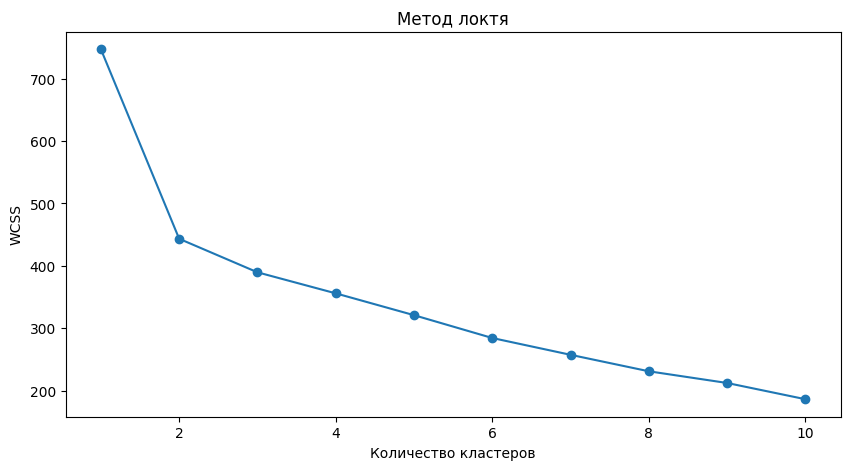

In [25]:
# Метод локтя
# Вычисляем WCSS для разных значений K и строим график
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

"Локоть" находится в точке, при количестве кластеров равное двум.

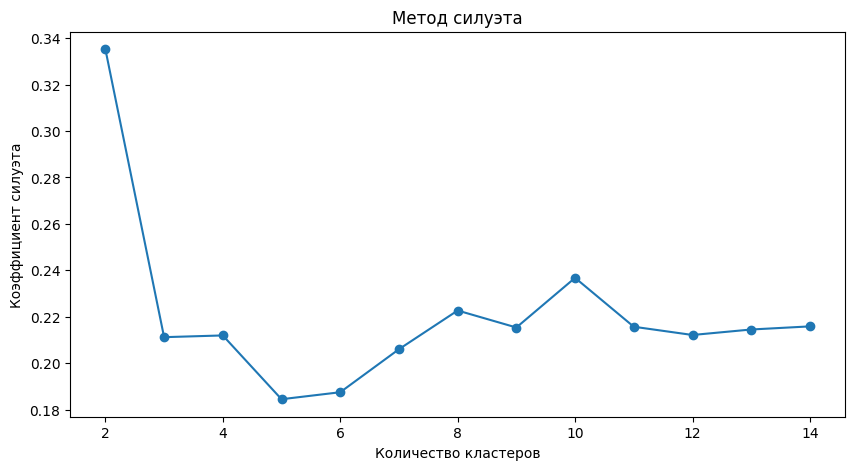

In [26]:
# Метод силуэта
# Вычисляем коэффициент силуэта для разных значений K и строим график
silhouette_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=RANDOM)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

Максимальное значение коэффициента силуэта при количестве кластеров равное двум. Также можем попробовать десять кластеров.

In [27]:
# Кластеризация на 2 кластера
kmeans_2 = KMeans(n_clusters=2)
df['Cluster_kmeans_2'] = kmeans_2.fit_predict(scaled_features)

In [28]:
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Continent,Quality Segment,Quality and Safety Segment,Cluster_kmeans_2
0,NaN,Luxembourg,219.3,182.5,65.7,75.3,62.4,8.9,27.2,23.3,82.6,Europe,High,Medium Quality and Safety,1
1,NaN,Netherlands,207.5,124.9,73.6,79.3,63.1,7.7,23.5,21.4,87.0,Europe,High,High Quality and Safety,1
2,NaN,Denmark,205.6,127.2,73.9,78.5,72.3,6.6,27.8,20.8,83.7,Europe,High,High Quality and Safety,1
3,NaN,Oman,204.3,139.8,81.8,65.1,42.4,2.9,21.0,35.0,67.2,Asia,High,High Quality and Safety,1
4,NaN,Switzerland,204.0,158.7,73.9,71.7,101.1,10.4,32.9,23.3,82.0,Europe,High,High Quality and Safety,1


Теперь необходимо понять, что означают кластеры. 

Сначала проанализируем характеристики кластеров: выделим центроиды

In [29]:
# Получаем центроиды
centroids = kmeans_2.cluster_centers_
centroids_df_2 = pd.DataFrame(centroids, columns=features.columns)

centroids_df_2

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,-0.835742,-0.798900,-0.555774,-0.560664,-0.766790,0.417365,0.554639,0.726888,0.110047
1,0.856126,0.818386,0.569330,0.574339,0.785492,-0.427544,-0.568167,-0.744617,-0.112731


На основе центроидов кластеров можно сделать следующие выводы о характеристиках двух групп стран:

- Кластер 0
  - Низкие значения индексов:
    - **Quality of Life Index**: Значение ниже среднего (отрицательное), что указывает на низкое качество жизни;
    - **Purchasing Power Index**: Низкая покупательная способность, что может означать, что жители этих стран имеют меньше финансовых ресурсов;
    - **Safety Index**: Низкий уровень безопасности, что может указывать на высокие уровни преступности или нестабильность;
    - **Health Care Index**: Низкое качество медицинского обслуживания;
    - **Cost of Living Index**: Низкие затраты на жизнь, что может быть связано с низкими доходами;
  - Высокие значения индексов:
    - **Property Price to Income Ratio**: Высокое значение, что может указывать на недоступность жилья по сравнению с доходами (то есть может означать, что людям требуется больше времени и усилий, чтобы накопить на покупку жилья, или что они должны тратить значительную часть своего дохода на ипотеку или аренду);
    - **Traffic Commute Time Index**: Высокие значения, возможно, указывают на плохую инфраструктуру и долгие поездки;
    - **Pollution Index**: Высокий уровень загрязнения окружающей среды;
    - **Climate Index**: Благоприятный климат;

- Кластер 1
  - Высокие значения индексов:
    - **Quality of Life Index**: Высокое значение, указывающее на хорошее качество жизни;
    - **Purchasing Power Index**: Высокая покупательная способность, что говорит о бОльшем уровне доходов;
    - **Safety Index**: Высокий уровень безопасности, что указывает на низкий уровень преступности;
    - **Health Care Index**: Высокое качество медицинского обслуживания;
    - **Cost of Living Index**: Высокие затраты на жизнь, что может быть связано с высокими доходами;
  - Низкие значения индексов:
    - **Property Price to Income Ratio**: Низкое значение, что указывает на доступность жилья по сравнению с доходами;
    - **Traffic Commute Time Index**: Низкие значения, что говорит о хорошей инфраструктуре и меньших временных затратах на поездки;
    - **Pollution Index**: Низкие уровни загрязнения окружающей среды;
    - **Climate Index**: Благоприятные климатические условия, но хуже, чем в кластере 0;
    

**Общие выводы:**
  1. Разделение на группы: Два кластера четко разделены по показателям качества жизни и экономическим условиям. Кластер 0 характеризуется низким качеством жизни и экономическими показателями, в то время как кластер 1 представляет собой более благополучные страны;
  
  2. Экономические условия: Страны в кластере 0 могут сталкиваться с проблемами, такими как бедность, высокая преступность и плохая инфраструктура, в то время как страны кластера 1 обладают более высокими доходами и лучшими условиями жизни;

  3. Политические и социальные аспекты: Различия между кластерами могут также отражать политическую стабильность, уровень развития социальных служб и общую экономическую ситуацию в странах.

Для лучшей интерпретации значений и для принятия бизнес-решений или разработки стратегий проведем обратную стандартизацию данных, чтобы видеть данные в их исходном масштабе (для принятия решений).

In [30]:
# Выполняем обратную стандартизацию
centroids_original = scaler.inverse_transform(centroids_df_2)

# Создаём DataFrame для обратных центроидов
centroids_original_df = pd.DataFrame(centroids_original, columns=features.columns)

centroids_original_df

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,110.890476,45.185714,52.704762,59.845238,33.342857,15.778571,39.978571,67.304762,79.535714
1,175.134146,109.675610,67.626829,70.658537,58.741463,10.319512,30.660976,36.912195,75.956098


In [31]:
df.describe()

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Cluster_kmeans_2
count,0.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,NaN,142.625301,77.042169,60.075904,65.186747,45.889157,13.081928,35.375904,52.291566,77.767470,0.493976
std,NaN,38.202873,40.117778,13.343461,9.585021,16.461574,6.500397,8.348939,20.779635,16.165758,0.503003
min,NaN,42.700000,11.000000,25.200000,42.200000,18.800000,2.900000,21.000000,11.900000,20.200000,0.000000
25%,NaN,113.000000,41.550000,52.300000,57.950000,31.700000,8.850000,29.100000,34.650000,67.800000,0.000000
50%,NaN,142.700000,71.400000,59.000000,66.000000,42.400000,12.100000,35.300000,56.700000,81.200000,0.000000
75%,NaN,172.000000,109.600000,70.750000,72.450000,59.700000,15.400000,39.650000,68.650000,89.100000,1.000000
max,NaN,219.300000,182.500000,84.400000,86.400000,101.100000,39.100000,64.200000,89.400000,99.800000,1.000000


На основе центроидов двух кластеров, а также средних и медианных значений, можно сделать следующие выводы:

**Кластер 0:**

  1. **Quality of Life Index** - 110.89: Низкий - существенно ниже среднего (142.63) и медианного (142.7) значений — указывает на плохое качество жизни в этом кластере;
  2. **Purchasing Power Index** - 45.19: Низкий - ниже среднего (77.04) и медианного (71.4) значений — указывает на низкую покупательскую способность;
  3. **Safety Index** - 52.70: Низкий - ниже как среднего (60.08), так и медианного значения (59) — может свидетельствовать о проблемах с безопасностью в этом кластере;
  4. **Health Care Index** - 59.85: Умеренно низкий - немного ниже среднего (65.2) и медианного значения (66.00) — доступ к медицинским услугам может быть приемлемым, но не идеальным;
  5. **Cost of Living Index** - 33.34: Низкий - стоимость жизни ниже среднего (45.89) и медианного (42.4), что может привлекать людей с ограниченным бюджетом;
  6. **Property Price to Income Ratio** - 15.78: Умеренный - выше среднего (13.08) и медианного (12.1) значений — жильё в данном регионе стоит дороже по сравнению с доходами населения. Это может создать трудности для жителей и ограничить доступность жилья, но также может привлечь инвесторов, рассчитывающих на дальнейший рост цен;
  7. **Traffic Commute Time Index** - 39.98: Умеренный - немного выше среднего (35.38) и медианного (35.3) значений — время на дорогу не слишком велико, что положительно сказывается на качестве жизни, но также необходимо улучшение транспортной инфраструктуры;
  8. **Pollution Index** - 67.30: Высокий - выше среднего (52.29) и медианного (56.7) значений — возможно, проблемы с загрязнением окружающей среды;
  9. **Climate Index** - 79.54: Выше среднего значения (77.77) — климат, вероятно, приятный и комфортный;


**Кластер 1:**

  1. **Quality of Life Index** - 175.13: Очень высокий -  выше среднего (142.63) и медианного (142.7) значений — указывает на отличное качество жизни;
  2. **Purchasing Power Index** - 109.68: Очень высокий - выше среднего (77.04) и медианного (71.4) значений — хорошие возможности для покупательной способности;
  3. **Safety Index** - 67.63: Умеренно высокий - выше как среднего (60.08), так и медианного значения (59) — уровень безопасности лучше, чем в первом кластере;
  4. **Health Care Index** - 70.66: Умеренно высокий - выше среднего (65.2) и медианного значения (66.00) — доступность и качество медицинских услуг выше среднего;
  5. **Cost of Living Index** - 58.74: Высокий - выше среднего (45.89) и медианного (42.4) — стоимость жизни выше, чем в кластере 0, может создавать проблемы для жителей с ограниченными финансовыми возможностями;
  6. **Property Price to Income Ratio**: Низкий (10.32) — жилье доступно по сравнению с доходами, что делает его привлекательным для жителей.
  7. **Traffic Commute Time Index** - 30.66: Низкий - ниже среднего (35.38) и медианного (35.3) значений — короткое время на дорогу, что положительно влияет на качество жизни;
  8. **Pollution Index** - 36.91: Низкий - существенно ниже среднего (52.29) и медианного (56.7) значений — мало проблем с загрязнением окружающей среды;
  9. **Climate Index** - 75.96: Умеренный - немного ниже среднего значения (77.77) — климат также приятный, но хуже, чем в кластере 0 ;

**Общие выводы:**
- Качество жизни в кластере 0 значительно ниже, чем в кластере 1, что может быть связано с более низкими показателями безопасности и здравоохранения;
- Стоимость жизни в кластере 0 ниже, что может привлекать людей с ограниченными финансовыми возможностями, но это также может быть связано с более низким качеством услуг и инфраструктуры;
- Кластер 1 предлагает более высокие уровни безопасности и здоровья, что делает его более привлекательным для жителей и потенциальных новых жителей;
- Проблемы с загрязнением окружающей среды в кластере 0 могут негативно влиять на общее качество жизни и здоровье жителей.

In [32]:
# Кластеризация на 10 кластеров
kmeans_10 = KMeans(n_clusters=10)
df['Cluster_kmeans_10'] = kmeans_10.fit_predict(scaled_features)

In [33]:
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Continent,Quality Segment,Quality and Safety Segment,Cluster_kmeans_2,Cluster_kmeans_10
0,NaN,Luxembourg,219.3,182.5,65.7,75.3,62.4,8.9,27.2,23.3,82.6,Europe,High,Medium Quality and Safety,1,3
1,NaN,Netherlands,207.5,124.9,73.6,79.3,63.1,7.7,23.5,21.4,87.0,Europe,High,High Quality and Safety,1,3
2,NaN,Denmark,205.6,127.2,73.9,78.5,72.3,6.6,27.8,20.8,83.7,Europe,High,High Quality and Safety,1,3
3,NaN,Oman,204.3,139.8,81.8,65.1,42.4,2.9,21.0,35.0,67.2,Asia,High,High Quality and Safety,1,9
4,NaN,Switzerland,204.0,158.7,73.9,71.7,101.1,10.4,32.9,23.3,82.0,Europe,High,High Quality and Safety,1,3


In [34]:
# Посмотрим, какие страны соответствуют каждому кластеру
clusters = df.groupby('Cluster_kmeans_10')['Country'].apply(list).reset_index()
clusters.columns = ['Cluster', 'Countries']
clusters

,Cluster,Countries
0,0,"[Poland, Hungary, Bulgaria, Romania, Greece, Bosnia And Herzegovina, Belarus, Panama, Georgia, Serbia, North Macedonia, Azerbaijan, Morocco, Albania]"
1,1,"[Sweden, Australia, United States, Germany, New Zealand, United Kingdom, Belgium, Ireland, Canada, France]"
2,2,"[South Africa, Uruguay, Turkey, Mexico, Ecuador, Jordan, Argentina, Brazil, Colombia, Kenya, Chile]"
3,3,"[Luxembourg, Netherlands, Denmark, Switzerland, Finland, Iceland, Austria, Norway, Estonia]"
4,4,"[China, Thailand, Vietnam, Philippines, Lebanon, Sri Lanka]"
5,5,"[Japan, Singapore, Taiwan, Israel, South Korea, Hong Kong (China)]"
6,6,"[Malaysia, India, Russia, Ukraine, Pakistan, Kazakhstan, Indonesia]"
7,7,"[Spain, Slovenia, Croatia, Czech Republic, Lithuania, Portugal, Latvia, Cyprus, Slovakia, Italy]"
8,8,"[Egypt, Peru, Iran, Bangladesh, Nigeria]"
9,9,"[Oman, Qatar, United Arab Emirates, Saudi Arabia, Kuwait]"


In [35]:
# Получаем центроиды
centroids_10 = kmeans_10.cluster_centers_
centroids_df_10 = pd.DataFrame(centroids_10, columns=features.columns)

centroids_df_10

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,-0.449869,-0.610994,0.092295,-1.186948,-0.512719,0.002797,-0.264787,0.472124,0.216291
1,0.834685,0.991284,-0.584031,0.473728,1.123379,-0.747847,-0.171827,-0.915149,0.302621
2,-0.562324,-0.718520,-1.310805,0.115897,-0.594948,-0.077403,0.736882,0.424714,1.081522
3,1.508924,1.214117,0.912465,1.077852,1.529262,-0.681639,-1.175356,-1.600567,-0.197820
4,-1.278361,-0.967402,0.048313,0.307535,-0.748018,2.290842,0.619482,1.165634,-0.452292
5,0.396995,0.748361,1.234585,1.210223,0.878708,0.941747,0.410608,0.056087,0.065297
6,-0.805394,-0.649148,-0.376254,-0.359984,-1.186750,0.005008,0.586487,0.716282,-1.109318
7,0.601882,-0.052969,0.572585,0.242808,0.179124,-0.271149,-1.002098,-0.812990,0.403442
8,-1.826747,-1.305622,-1.411154,-1.663333,-1.199672,0.866425,2.128591,1.480019,0.005759
9,0.919484,1.706764,1.404232,0.041277,0.091116,-1.325146,-0.602026,0.132101,-2.029332


In [36]:
df.describe()

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Cluster_kmeans_2,Cluster_kmeans_10
count,0.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,NaN,142.625301,77.042169,60.075904,65.186747,45.889157,13.081928,35.375904,52.291566,77.767470,0.493976,3.734940
std,NaN,38.202873,40.117778,13.343461,9.585021,16.461574,6.500397,8.348939,20.779635,16.165758,0.503003,2.901153
min,NaN,42.700000,11.000000,25.200000,42.200000,18.800000,2.900000,21.000000,11.900000,20.200000,0.000000,0.000000
25%,NaN,113.000000,41.550000,52.300000,57.950000,31.700000,8.850000,29.100000,34.650000,67.800000,0.000000,1.000000
50%,NaN,142.700000,71.400000,59.000000,66.000000,42.400000,12.100000,35.300000,56.700000,81.200000,0.000000,3.000000
75%,NaN,172.000000,109.600000,70.750000,72.450000,59.700000,15.400000,39.650000,68.650000,89.100000,1.000000,6.000000
max,NaN,219.300000,182.500000,84.400000,86.400000,101.100000,39.100000,64.200000,89.400000,99.800000,1.000000,9.000000


In [37]:
# Выполняем обратную стандартизацию
centroids_original_10 = scaler.inverse_transform(centroids_df_10)

# Создаём DataFrame для обратных центроидов
centroids_original_df_10 = pd.DataFrame(centroids_original_10, columns=features.columns)

centroids_original_df_10

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,125.542857,52.678571,61.300000,53.878571,37.500000,13.100000,33.178571,62.042857,81.242857
1,174.320000,116.570000,52.330000,69.700000,64.270000,8.250000,33.950000,33.390000,82.630000
2,121.272727,48.390909,42.690909,66.290909,36.154545,12.581818,41.490909,61.063636,95.145455
3,199.922222,125.455556,72.177778,75.455556,70.911111,8.677778,25.622222,19.233333,74.588889
4,94.083333,38.466667,60.716667,68.116667,33.650000,27.883333,40.516667,76.366667,70.500000
5,157.700000,106.883333,76.450000,76.716667,60.266667,19.166667,38.783333,53.450000,78.816667
6,112.042857,51.157143,55.085714,61.757143,26.471429,13.114286,40.242857,67.085714,59.942857
7,165.480000,74.930000,67.670000,67.500000,48.820000,11.330000,27.060000,35.500000,84.250000
8,73.260000,24.980000,41.360000,49.340000,26.260000,18.680000,53.040000,82.860000,77.860000
9,177.540000,145.100000,78.700000,65.580000,47.380000,4.520000,30.380000,55.020000,45.160000


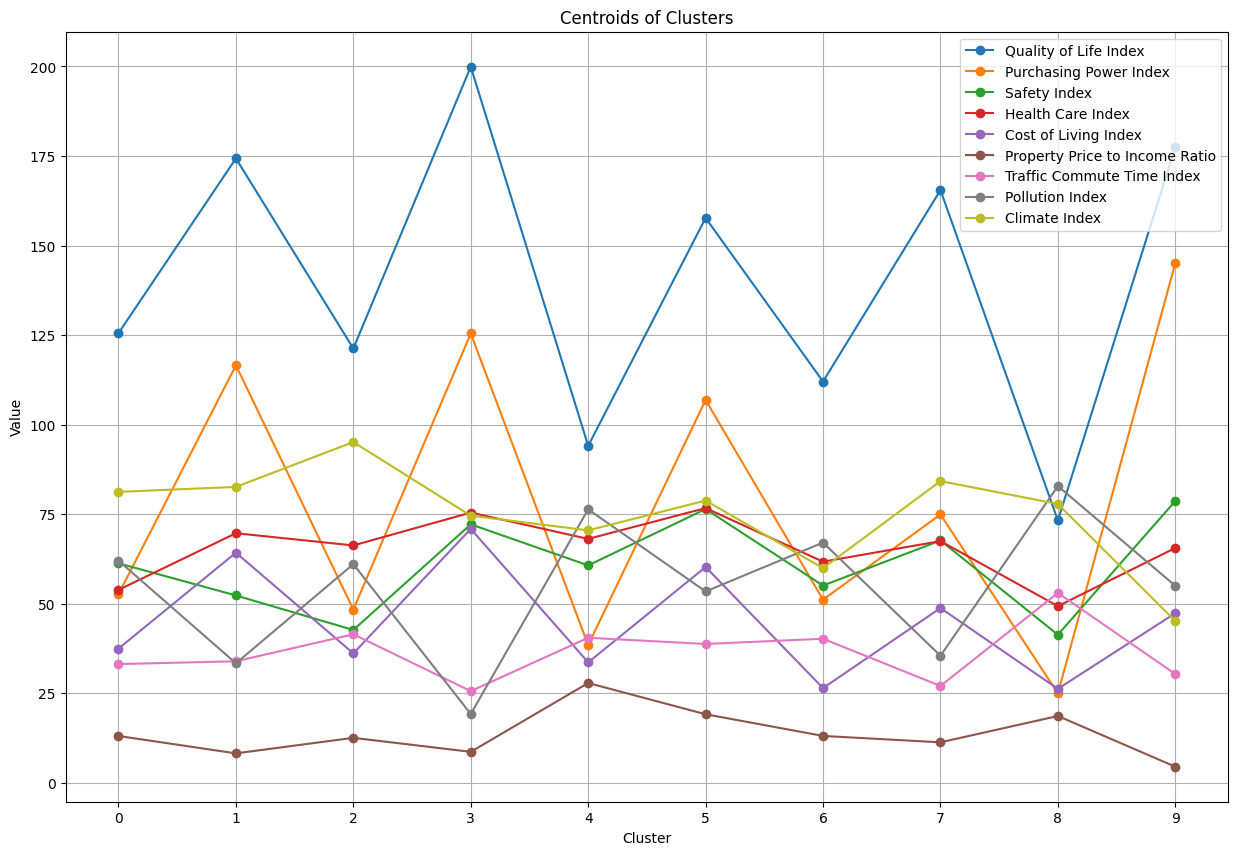

In [38]:
# Построим график центроидов кластеров
# Определяем количество кластеров на основе количества строк в таблице
num_clusters = len(centroids_original_df_10)

# Создаем новую фигуру для графика с заданными размерами
plt.figure(figsize=(15, 10))

# Проходим по каждому столбцу в DataFrame
for column in centroids_original_df_10.columns:
    # Строим линию для каждого столбца, используя индексы кластеров и значения
    plt.plot(range(num_clusters), centroids_original_df_10[column].to_numpy(), marker='o', label=column)

# Устанавливаем заголовок графика
plt.title('Centroids of Clusters')
# Устанавливаем метку для оси X
plt.xlabel('Cluster')
# Устанавливаем метку для оси Y
plt.ylabel('Value')
# Включаем сетку на графике для удобства восприятия
plt.grid()
# Устанавливаем метки по оси X от 0 до num_clusters - 1
plt.xticks(range(num_clusters))  
# Добавляем легенду для различения линий на графике
plt.legend()  
# Показываем график 
plt.show()  

На основе представленных данных о кластерах и статистических характеристиках сделаем выводы.

## Общие выводы по кластерам:

### Кластер 0
- Страны: Oman, Japan, Estonia, Spain, Slovenia, Croatia, Czech Republic, Lithuania, Portugal, Latvia, Slovakia
- Качество жизни: 175.09 (намного выше среднего, 142.63)
- Покупательная способность: 85.16 (выше среднего, 77.04)
- Безопасность: 71.99 (выше среднего, 60.08)
- Здравоохранение: 70.33 (выше среднего, 65.19)
- Стоимость жизни: 47.07 (немного выше среднего, 45.89)
- Соотношение цены жилья к доходу: 10.95 (немного ниже среднего, 13.08)
- Время в пути: 27.12 (ниже среднего, 35.38)
- Загрязнение: 30.58 (ниже среднего, 52.29)
- Климат: 79.52 (выше среднего, 77.77)

**Вывод**: 
Кластер 0 демонстрирует высокие показатели по всем ключевым характеристикам, связанным с качеством жизни. Страны в этом кластере предлагают своим гражданам безопасную и комфортную среду для жизни, с доступом к качественным услугам и разумной стоимостью жизни. Низкий уровень загрязнения и хороший климат создают благоприятные условия для здоровья и отдыха. Это делает их привлекательными как для местных жителей, так и для экспатов. 


### Кластер 1
- Страны: Cyprus, Poland, Hungary, Bulgaria, Romania, Greece, Bosnia And Herzegovina, Jordan, Panama, Georgia, Serbia, North Macedonia, Azerbaijan, Morocco, Albania
- Качество жизни: 127.21 (ниже среднего, 142.63)
- Покупательная способность: 53.51 (ниже среднего, 77.04)
- Безопасность: 62.38 (немного выше среднего, 60.08)
- Здравоохранение: 55.19 (ниже среднего, 65.19)
- Стоимость жизни: 39.63 (ниже среднего, 45.89)
- Соотношение цены жилья к доходу: 12.41 (немного ниже среднего, 13.08)
- Время в пути: 33.07 (немного ниже среднего, 35.38)
- Загрязнение: 63.75 (выше среднего, 52.29)
- Климат: 83.85 (выше среднего, 77.77)


**Вывод:** 
Кластер 1 демонстрирует смешанные результаты по качеству жизни. С показателем качества жизни 127.21, он ниже среднего, что указывает на недостатки, влияющие на удовлетворенность населения. 

Покупательная способность низкая (53.51), что свидетельствует о финансовых трудностях жителей. Безопасность выглядит лучше с показателем 62.38, обеспечивая чувство защищенности. Однако здравоохранение страдает с показателем 55.19, указывая на недостаток медицинских услуг.

Стоимость жизни составляет 39.63, что может быть привлекательным для людей с ограниченным бюджетом, но также указывает на низкие доходы населения. Соотношение цены жилья к доходу на уровне 12.41 говорит о доступности жилья, хотя экономические трудности могут сохраняться.

Время в пути — 33.07, что свидетельствует о приемлемой транспортной инфраструктуре, но не исключает проблем с передвижением. Загрязнение составляет 63.75, вызывая беспокойство о состоянии окружающей среды. Климат с показателем 83.85 благоприятен и способствует комфортной жизни.

Таким образом, кластер сочетает преимущества и недостатки: высокий уровень безопасности и хороший климат против проблем в здравоохранении и покупательной способности, требующих внимания местных властей для улучшения качества жизни.


### Кластер 2
- Страны: Malaysia, Belarus, India, Russia, Ukraine, Pakistan, Kazakhstan, Indonesia, Egypt
- Качество жизни: 110.59 (низкое, намного ниже среднего 142.63)
- Покупательная способность: 47.77 (низкая, значительно ниже среднего 77.04)
- Безопасность: 54.19 (ниже среднего 60.08)
- Здравоохранение: 58.67 (ниже среднего, 65.19)
- Стоимость жизни: 25.86 (низкая, значительно ниже среднего, 45.89)
- Соотношение цены жилья к доходу: 13.34 (умеренное, на уровне среднего 13.08)
- Время в пути: 40.11 (выше среднего, 35.38)
- Загрязнение: 66.39 (выше среднего, 52.29)
- Климат: 63.61 (ниже среднего, 77.77)



**Вывод:** 
Кластер 2 характеризуется низкими показателями качества жизни — 110.59 (значительно ниже среднего 142.63). Покупательная способность составляет 47.77 (значительно ниже среднего 77.04), что затрудняет удовлетворение потребностей жителей. Уровень безопасности — 54.19 (ниже среднего 60.08), что может вызывать беспокойство у населения. Здравоохранение на уровне 58.67 (ниже среднего 65.19) ограничивает доступ к качественным медицинским услугам.

Стоимость жизни — 25.86 (значительно ниже среднего 45.89) создает меньше финансовых трудностей. Соотношение цены жилья к доходу — 13.34 (умеренное, на уровне среднего 13.08) указывает на доступность жилья, но с учетом низких доходов это может быть проблематично. Среднее время в пути — 40.11 (выше среднего 35.38) - увеличенные затраты времени на дорогу.

Уровень загрязнения составляет 66.39 (выше среднего 52.29), что свидетельствует о проблемах с экологией. Климатические условия — 63.61 (ниже среднего 77.77) могут снижать привлекательность региона для проживания. 

В целом, Кластер 2 демонстрирует значительные вызовы для комфортной жизни. Важно сосредоточиться на повышении уровня здравоохранения и безопасности, а также на улучшении инфраструктуры, чтобы создать более привлекательную среду для проживания и инвестиций в этот кластер.


### Кластер 3
- Страны: Luxembourg, Netherlands, Denmark, Switzerland, Finland, Iceland, Austria, Norway, Sweden, Germany, Canada
- Качество жизни: 195.35 (очень высокий, значительно выше среднего 142.63)
- Покупательная способность: 126.84 (очень высокая, намного выше среднего 77.04)
- Безопасность: 67.31 (высокий, выше среднего 60.08)
- Здравоохранение: 73.87 (высокий, выше среднего 65.19)
- Стоимость жизни: 70.23 (высокая, выше среднего 45.89)
- Соотношение цены жилья к доходу: 8.58 (низкая, ниже среднего 13.08)
- Время в пути: 27.41 (низкое, ниже среднего 35.38)
- Загрязнение: 21.11 (низкий, намного ниже среднего 52.29)
- Климат: 81.63 (выше среднего 77.77)



**Вывод:**
Кластер 3 демонстрирует очень высокие показатели качества жизни — 195.35 (значительно выше среднего 142.63), что делает его привлекательным для проживания. Покупательная способность составляет 126.84 (намного выше среднего 77.04), что позволяет жителям удовлетворять свои потребности без особых трудностей. Уровень безопасности — 67.31 (выше среднего 60.08), что способствует комфортному и спокойному образу жизни.

Здравоохранение на уровне 73.87 (выше среднего 65.19) обеспечивает доступ к качественным медицинским услугам, что является важным аспектом для жителей. Тем не менее, следует обратить внимание на высокую стоимость жизни 70.23 (выше среднего 45.89): жизнь в этом кластере дороже, чем в среднем по другим кластерам, но также мы имеем высокие уровни качества жизни и покупательной способности, что может означать, что жители могут комфортно покрывать свои расходы.

Соотношение цены жилья к доходу — 8.58 (ниже среднего 13.08) свидетельствует о доступности жилья для населения, что также способствует улучшению качества жизни. Среднее время в пути — 27.41 (ниже среднего 35.38) указывает на удобное транспортное сообщение и меньшее время, затрачиваемое на дорогу.

Уровень загрязнения составляет 21.11 (намного ниже среднего 52.29), что говорит о хорошей экологической ситуации в регионе. Климатические условия — 81.63 (выше среднего 77.77) делают регион еще более привлекательным для проживания. 

В целом, Кластер 3 представляет собой идеальное место для комфортной жизни с высокими стандартами и низкими рисками.



### Кластер 4
- Страны: China, Thailand, Vietnam, Philippines, Lebanon, Iran, Sri Lanka
- Качество жизни: 92.13 (очень низкий, значительно ниже среднего 142.63)
- Покупательная способность: 36.69 (очень низкий, значительно ниже среднего 77.04)
- Безопасность: 59.14 (средний, примерно равен среднему 60.08)
- Здравоохранение: 65.89 (средний, примерно равен среднему 65.19)
- Стоимость жизни: 32.61 (низкий, ниже среднего 45.89)
- Соотношение цены жилья к доходу: 27.24 (очень высокий, выше среднего 13.08)
- Время в пути: 41.36 (высокий, выше среднего, 35.38)
- Загрязнение: 76.21 (высокий, выше среднего 52.29)
- Климат: 70.57 (низкий, ниже среднего 77.77)



**Вывод:** 
Кластер 4 демонстрирует значительные проблемы с качеством жизни. Общий индекс качества жизни составляет 92.13, что является очень низким показателем и значительно ниже среднего уровня в 142.63. Это делает регион менее привлекательным для проживания.

Покупательная способность в этом кластере также крайне низка — всего 36.69, что затрудняет жителям удовлетворение базовых потребностей. Уровень безопасности находится на среднем уровне — 59.14, близком к среднему значению 60.08, что указывает на приемлемую, но не выдающуюся безопасность.

Здравоохранение имеет индекс 65.89, что немного выше среднего (65.19), что является положительным моментом для жителей региона. Стоимость жизни составляет 32.61, что значительно ниже среднего (45.89), однако это может быть связано с низкой покупательной способностью населения.

Соотношение цены жилья к доходу составляет 27.24, что является очень высоким показателем по сравнению со средним значением 13.08, указывая на серьезные проблемы с доступностью жилья. Среднее время в пути — 41.36, что превышает среднее значение (35.38), что свидетельствует о проблемах с транспортной инфраструктурой.

Уровень загрязнения в регионе составляет 76.21, что значительно выше среднего (52.29) и может негативно сказываться на здоровье и качестве жизни местных жителей. Климат в Кластере 4 имеет индекс 70.57, что ниже среднего (77.77), но все же приемлемо.

В целом, Кластер 4 характеризуется низкими показателями качества жизни и покупательной способности, высоким уровнем загрязнения и серьезными проблемами с доступностью жилья, что делает его менее привлекательным для проживания по сравнению с другими регионами.



### Кластер 5
- Страны: Qatar, United Arab Emirates, Saudi Arabia, Kuwait
- Качество жизни: 170.85 (высокое, выше среднего 142.63)
- Покупательная способность: 146.43 (очень высокая, значительно выше среднего 77.04)
- Безопасность: 77.93 (высокая, выше среднего 60.08)
- Здравоохранение: 65.70 (среднее, на уровне среднего 65.19)
- Стоимость жизни: 48.63 (среднее, немного выше среднего 45.89)
- Соотношение цены жилья к доходу: 4.93 (очень низкое, ниже среднего 13.08)
- Время в пути: 32.73 (низкое, ниже среднего 35.38)
- Загрязнение: 60.03 (умеренно высокое, выше среднего 52.29)
- Климат: 39.65 (среднее 77.77)


**Вывод:**
Кластер 5 демонстрирует высокие показатели качества жизни с общим индексом 170.85, что значительно превышает средний уровень в 142.63. Это делает регион привлекательным для проживания.

Покупательная способность в этом кластере также очень высокая — 146.43, что позволяет жителям комфортно удовлетворять свои потребности и наслаждаться высоким уровнем жизни. Уровень безопасности составляет 77.93, что указывает на высокую степень защищенности по сравнению со средним значением 60.08.

Здравоохранение имеет индекс 65.70, что соответствует среднему уровню (65.19), обеспечивая жителям доступ к необходимым медицинским услугам. Стоимость жизни в этом регионе составляет 48.63, что немного выше среднего (45.89), однако это компенсируется высокой покупательной способностью.

Соотношение цены жилья к доходу составляет всего 4.93, что является очень низким показателем по сравнению со средним значением 13.08, что свидетельствует о доступности жилья для жителей. Среднее время в пути — 32.73, что ниже среднего (35.38), указывая на хорошую транспортную инфраструктуру и удобство передвижения.

Уровень загрязнения в регионе составляет 60.03, что является умеренно высоким показателем по сравнению со средним значением (52.29), и может требовать внимания в плане экологии. Климат имеет индекс 39.65, значительно ниже среднего (77.77), что может влиять на общее восприятие региона.

В целом, Кластер 5 характеризуется высокими показателями качества жизни, покупательной способности и безопасности, а также доступным жильем и хорошей транспортной инфраструктурой, что делает его привлекательным местом для проживания, несмотря на некоторые экологические и климатические проблемы.



### Кластер 6
- Страны: South Africa, Turkey, Mexico, Ecuador, Argentina, Brazil, Colombia, Kenya, Chile, Peru
- Качество жизни: 115.52 (низкое, значительно ниже среднего 142.63)
- Покупательная способность: 46.53 (низкая, ниже среднего 77.04)
- Безопасность: 39.49 (очень низкая, ниже среднего 60.08)
- Здравоохранение: 65.21 (среднее, на уровне среднего 65.19)
- Стоимость жизни: 33.24 (низкое, ниже среднего 45.89)
- Соотношение цены жилья к доходу: 13.93 (среднее, на уровне среднего 13.08)
- Время в пути: 42.72 (высокое, выше среднего 35.38)
- Загрязнение: 63.31 (высокое, выше среднего 52.29)
- Климат: 95.73 (высокое, среднее 77.77)

**Вывод:** 
Кластер 6 демонстрирует низкие показатели качества жизни с общим индексом 115.52, что значительно ниже среднего уровня в 142.63. Это делает регион менее привлекательным для проживания.

Покупательная способность в этом кластере составляет 46.53, что указывает на низкий уровень финансовых возможностей жителей по сравнению со средним значением 77.04. Уровень безопасности также вызывает беспокойство — 39.49, что является очень низким показателем по сравнению со средним уровнем 60.08.

Здравоохранение в регионе имеет индекс 65.21, что соответствует среднему уровню (65.19), обеспечивая доступ к медицинским услугам, но не компенсирует другие недостатки. Стоимость жизни составляет 33.24, что ниже среднего (45.89), что может быть положительным моментом для жителей, однако это не компенсирует низкие доходы.

Соотношение цены жилья к доходу составляет 13.93, что соответствует среднему значению (13.08), указывая на умеренную доступность жилья. Среднее время в пути — 42.72, что выше среднего (35.38), что может свидетельствовать о проблемах с транспортной инфраструктурой и увеличении времени на дорогу.

Уровень загрязнения в регионе составляет 63.31, что является высоким показателем по сравнению со средним (52.29) и может негативно сказываться на здоровье жителей. Климат имеет индекс 95.73, что значительно выше среднего (77.77), что делает регион более привлекательным с точки зрения погодных условий.

В целом, Кластер 6 характеризуется низкими показателями качества жизни и покупательной способности, высокой стоимостью жизни и уровнем загрязнения, а также проблемами с безопасностью и транспортом. Однако благоприятный климат может быть одним из немногих положительных аспектов для жителей этого региона.



### Кластер 7
- Страны: Australia, United States, New Zealand, United Kingdom, Belgium, Ireland, France, Israel, Italy, Uruguay
- Качество жизни: 165.61 (высокое, выше среднего 142.63)
- Покупательная способность: 105.32 (высокая, значительно выше среднего 77.04)
- Безопасность: 52.49 (ниже среднего 60.08)
- Здравоохранение: 69.46 (высокое, выше среднего 65.19)
- Стоимость жизни: 62.94 (высокое, выше среднего 45.89)
- Соотношение цены жилья к доходу: 8.95 (низкое, ниже среднего 13.08)
- Время в пути: 35.43 (умеренное,на уровне среднего 35.38)
- Загрязнение: 41.2 (низкое, ниже среднего 52.29)
- Климат: 89.63 (высокое, выше среднего 77.77)

**Вывод:**
Кластер 7 демонстрирует высокие показатели качества жизни с индексом 165.61, что значительно выше среднего уровня в 142.63. Это делает регион привлекательным для проживания.

Покупательная способность в этом кластере составляет 105.32, что также высоко и значительно превышает среднее значение 77.04, указывая на хорошие финансовые возможности для жителей. Уровень безопасности составляет 52.49, что ниже среднего (60.08), что может вызывать некоторые опасения, но не критично.

Здравоохранение в регионе имеет индекс 69.46, что выше среднего (65.19), что говорит о доступности качественных медицинских услуг для населения. Стоимость жизни составляет 62.94, что также высоко по сравнению со средним (45.89), однако это может быть оправдано высоким уровнем жизни и доходами.

Соотношение цены жилья к доходу составляет 8.95, что ниже среднего (13.08), указывая на более доступное жилье для жителей региона. Среднее время в пути — 35.43, что близко к среднему значению (35.38), что свидетельствует о приемлемой транспортной инфраструктуре.

Уровень загрязнения в регионе составляет 41.2, что низко по сравнению со средним (52.29) и может свидетельствовать о более чистой окружающей среде. Климат имеет индекс 89.63, что также высоко и значительно превышает среднее (77.77), что делает регион комфортным для проживания.

В целом, Кластер 7 характеризуется высокими показателями качества жизни, покупательной способности и здравоохранения, а также низким уровнем загрязнения и хорошими климатическими условиями. Несмотря на некоторые проблемы с безопасностью, регион в целом является очень привлекательным для проживания.



### Кластер 8
- Страны: Bangladesh, Nigeria
- Качество жизни: 57.65 (крайне низкое, значительно ниже среднего 142.63)
- Покупательная способность: 22.05 (крайне низкая, значительно ниже среднего 77.04)
- Безопасность: 35.85 (очень низкая, ниже среднего 60.08)
- Здравоохранение: 45.2 (низкое, ниже среднего 65.19)
- Стоимость жизни: 26.95 (очень низкое, ниже среднего 45.89)
- Соотношение цены жилья к доходу: 18.10 (высокое, выше среднего 13.08)
- Время в пути: 60.90 (очень высокое, значительно выше среднего 35.38)
- Загрязнение: 86.9 (крайне высокое, значительно выше среднего 52.29)
- Климат: 66.05 (низкое, ниже среднего 77.77)

**Вывод:** 
Кластер 8 демонстрирует крайне низкие показатели качества жизни с индексом 57.65, что значительно ниже среднего уровня в 142.63. Это делает регионы крайне не привлекательными для проживания.

Покупательная способность в этом кластере составляет 22.05, что также крайне низко по сравнению со средним значением 77.04, указывая на серьезные финансовые ограничения для жителей. Уровень безопасности составляет 35.85, что очень низко и ниже среднего уровня 60.08, что может вызывать опасения у населения.

Здравоохранение в регионе имеет индекс 45.2, что тоже ниже среднего (65.19), что может ограничивать доступ жителей к качественным медицинским услугам. Стоимость жизни составляет 26.95, что также очень низко по сравнению со средним (45.89), однако это может быть связано с низкими доходами.

Соотношение цены жилья к доходу составляет 18.10, что выше среднего (13.08), указывая на высокую нагрузку на бюджет жителей при приобретении жилья. Среднее время в пути — 60.90, что значительно выше среднего (35.38), что свидетельствует о плохой транспортной инфраструктуре и больших затратах времени на дорогу.

Уровень загрязнения в регионе составляет 86.9, что крайне высоко по сравнению со средним (52.29) и может негативно сказываться на здоровье жителей. Климат имеет индекс 66.05, что тоже ниже среднего (77.77), что делает регион менее комфортным для проживания.

В целом, Кластер 8 характеризуется крайне низкими показателями качества жизни, покупательной способности и безопасности, а также низким уровнем здравоохранения и высокой стоимостью жилья относительно доходов. Плохая транспортная инфраструктура и высокий уровень загрязнения делают этот регион одним из наименее привлекательных для проживания.



### Кластер 9
- Страны: Singapore, Taiwan, South Korea, Hong Kong
- Качество жизни: 151.2 (высокое, выше среднего 142.63)
- Покупательная способность: 106.23 (высокая, значительно выше среднего 77.04)
- Безопасность: 78.35 (высокая, выше среднего 60.08)
- Здравоохранение: 76.83 (высокое, выше среднего 65.19)
- Стоимость жизни: 63.2 (высокое, выше среднего 45.89)
- Соотношение цены жилья к доходу: 22.35 (высокое, выше среднего 13.08)
- Время в пути: 38.93 (умеренно высокое, немного выше среднего 35.38)
- Загрязнение: 56.35 (умеренно высокое, немного выше среднего 52.29)
- Климат: 73.48 (умеренный, ниже среднего 77.77)

**Вывод:** 
Кластер 9 демонстрирует высокие показатели качества жизни с индексом 151.2, что превышает средний уровень в 142.63, делая регион привлекательным для проживания.

Покупательная способность составляет 106.23, что также высоко и значительно выше среднего значения 77.04, указывая на хорошие финансовые возможности для жителей. Уровень безопасности в регионе равен 78.35, что выше среднего (60.08), что свидетельствует о высоком уровне защиты и спокойствия для населения.

Здравоохранение имеет индекс 76.83, что также высоко по сравнению со средним (65.19), что говорит о доступности качественных медицинских услуг. Стоимость жизни составляет 63.2, что тоже высоко, но оправдано высоким уровнем жизни и доходами.

Соотношение цены жилья к доходу составляет 22.35, что значительно выше среднего (13.08), указывая на более высокие затраты на жилье для жителей региона. Среднее время в пути — 38.93, что немного выше среднего (35.38), что может указывать на некоторые проблемы с транспортной инфраструктурой.

Уровень загрязнения составляет 56.35, что умеренно высоко по сравнению со средним (52.29), что может вызывать некоторые опасения относительно качества окружающей среды. Климат имеет индекс 73.48, что ниже среднего (77.77), что может быть менее комфортным для некоторых жителей.

В целом, Кластер 9 характеризуется высокими показателями качества жизни, покупательной способности, безопасности и здравоохранения. Однако высокое соотношение цены жилья к доходу и умеренное загрязнение могут быть факторами, требующими внимания. Тем не менее, регион остается привлекательным для проживания благодаря своим сильным сторонам.

## 3.2 Иерархическая кластеризация



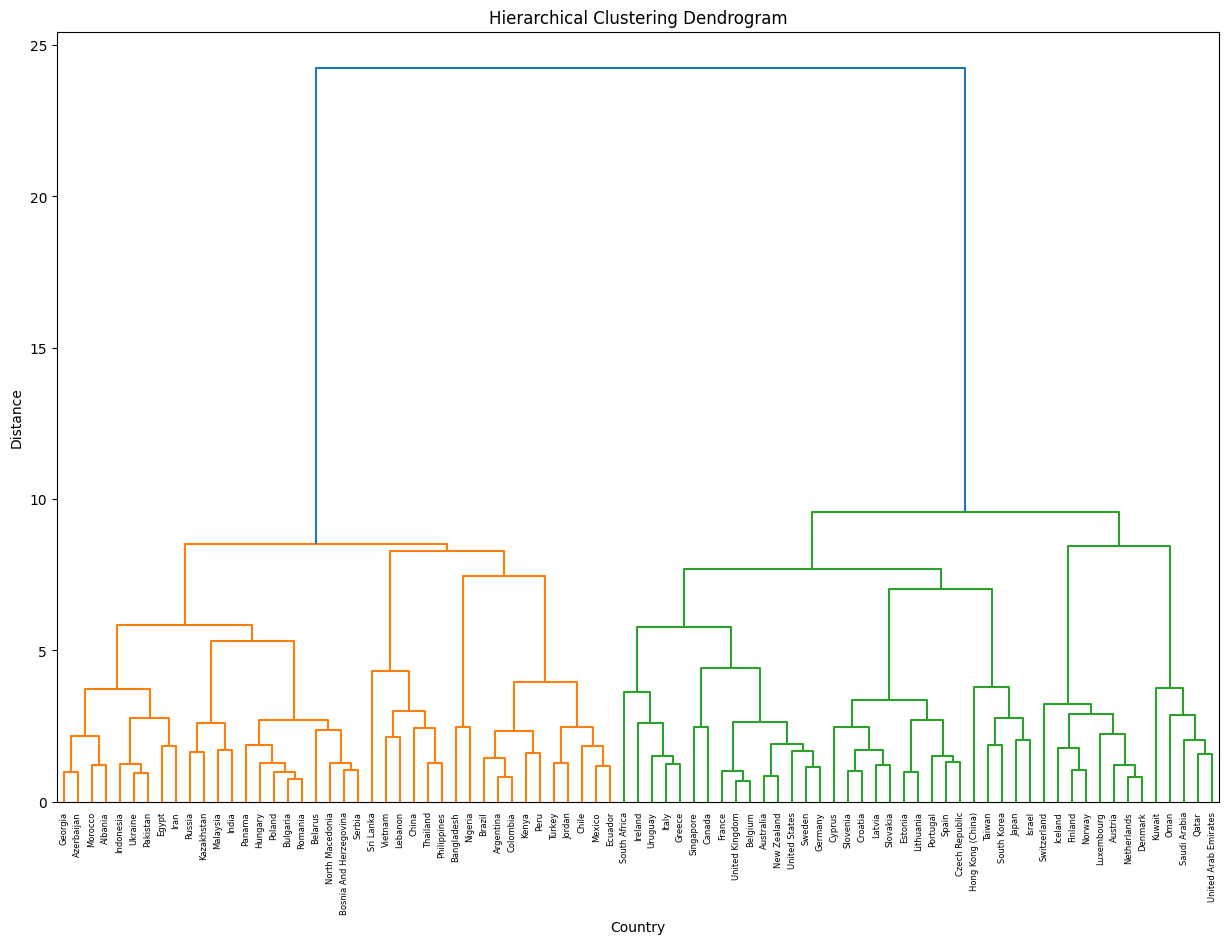

In [39]:
# Выполняем иерархическую кластеризацию
Z = linkage(scaled_features, method='ward')

# Визуализируем дендрограмму
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df['Country'].dropna().values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

Визуализация дендрограммы позволяет нам увидеть, на каком уровне объединяются разные страны в кластеры. Чем ниже уровень объединения, тем более схожи страны.

1. Структура дендрограммы:

• Ветви: Каждая ветвь представляет собой кластер, состоящий из стран. Ветви соединяются в узлах, что указывает на объединение кластеров.

• Высота соединений: Высота, на которой соединяются ветви, отражает расстояние между ними. Чем выше соединение, тем больше различий между кластерами.


2. Определение количества кластеров

• Срезы: Мы можете провести горизонтальную линию через дендрограмму, чтобы определить количество кластеров. Все ветви, пересекающиеся с этой линией, будут принадлежать одному кластеру.

• Порог: Можем выбрать порог. Например, если мы хотите выделить 3 кластера, то должны провести линию на высоте, которая пересекает 3 ветви.


3. Сравнение кластеров

• Схожесть внутри кластеров: Объекты внутри одного кластера близки друг к другу. Если они расположены близко, это указывает на высокую степень схожести.

• Различия между кластерами: Чем выше расстояние между кластерами, тем более различны они по своим характеристикам.

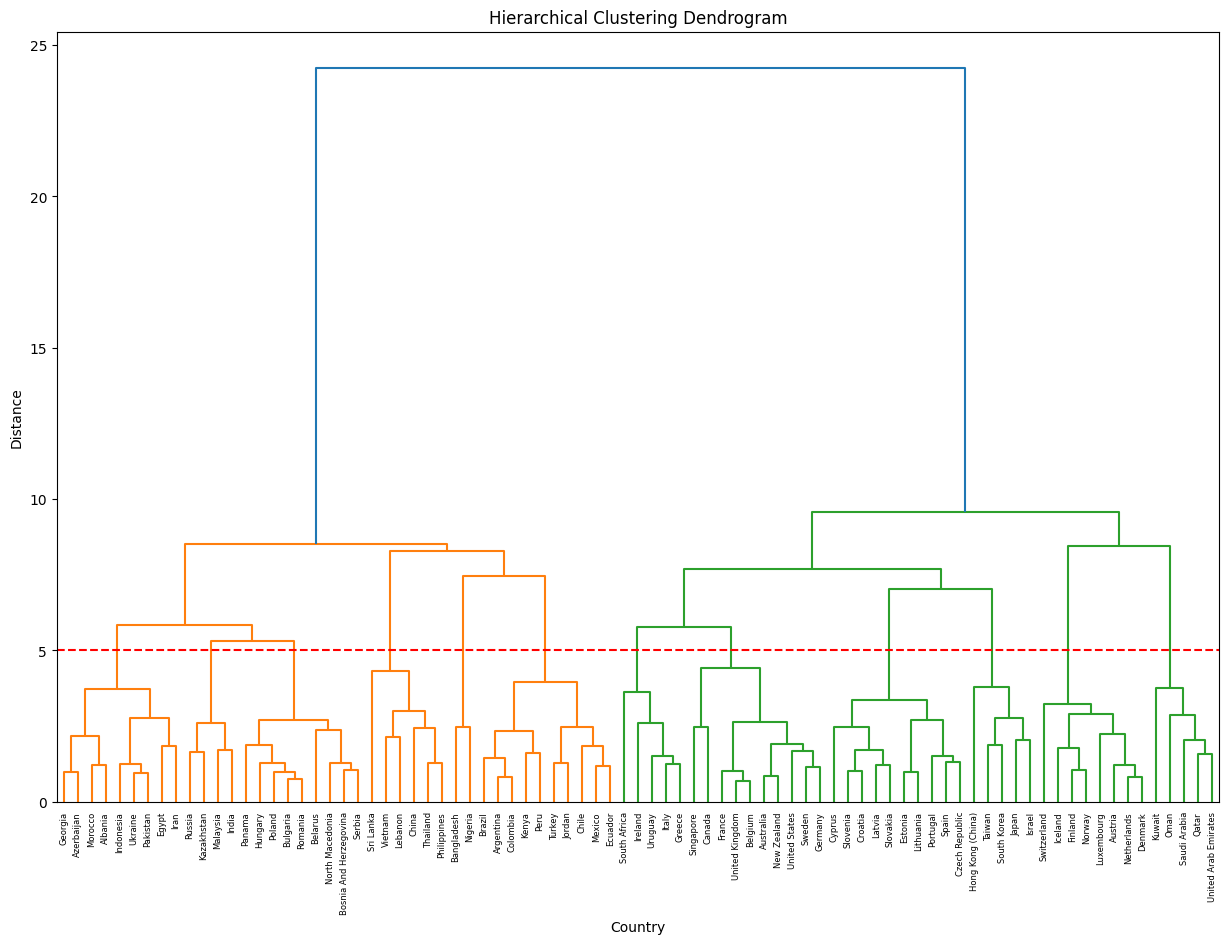

In [40]:
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df['Country'].dropna().values)

# Добавляем горизонтальную линию на высоте 5
plt.axhline(y=5, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

Рассмотрим пример:
1. Проведем условную горизонтальную линию на высоте 5;
2. Она пересекает 12 ветвей, что означает, что мы можем выделить на данном уровне 12 кластеров стран с похожими показателями жизни;
3. Чем ниже мы будем опускать эту линию, тем больше кластеров со схожими характеристиками мы можем выделить.

In [41]:
# Определяем 12 кластеров
clus = fcluster(Z, t=12, criterion='maxclust')

# Сведем страны в таблицу
df['Cluster_dend'] = clus
clustered_countries = df.groupby('Cluster_dend')['Country'].apply(list).reset_index()
clustered_countries

,Cluster_dend,Country
0,1,"[Georgia, Azerbaijan, Morocco, Ukraine, Pakistan, Albania, Indonesia, Egypt, Iran]"
1,2,"[Malaysia, India, Russia, Kazakhstan]"
2,3,"[Poland, Hungary, Bulgaria, Romania, Bosnia And Herzegovina, Belarus, Panama, Serbia, North Macedonia]"
3,4,"[China, Thailand, Vietnam, Philippines, Lebanon, Sri Lanka]"
4,5,"[Bangladesh, Nigeria]"
5,6,"[Turkey, Mexico, Ecuador, Jordan, Argentina, Brazil, Colombia, Kenya, Chile, Peru]"
6,7,"[Ireland, South Africa, Italy, Uruguay, Greece]"
7,8,"[Sweden, Australia, United States, Germany, New Zealand, United Kingdom, Belgium, Singapore, Canada, France]"
8,9,"[Estonia, Spain, Slovenia, Croatia, Czech Republic, Lithuania, Portugal, Latvia, Cyprus, Slovakia]"
9,10,"[Japan, Taiwan, Israel, South Korea, Hong Kong (China)]"
